In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Pujara_tests.xlsx')

In [4]:
df

,Inning,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
0,1,4,3,3,1,0,133.33,5,lbw,2,v Australia,Bengaluru,2010-10-09
1,2,72,129,89,7,0,80.89,3,bowled,4,v Australia,Bengaluru,2010-10-09
2,3,19,54,45,3,0,42.22,6,caught,1,v South Africa,Durban,2010-12-26
3,4,10,81,56,1,0,17.85,6,bowled,3,v South Africa,Durban,2010-12-26
4,5,2,17,14,0,0,14.28,6,lbw,2,v South Africa,Cape Town,2011-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,172,1,15,4,0,0,25.00,3,bowled,1,v Australia,Indore,2023-03-01
172,173,59,227,142,5,1,41.54,3,caught,3,v Australia,Indore,2023-03-01
173,174,42,188,121,3,0,34.71,3,lbw,2,v Australia,Ahmedabad,2023-03-09
174,175,14,35,25,2,0,56.00,3,bowled,2,v Australia,The Oval,2023-06-07


In [5]:
# Filtering the DataFrame to include data up to the 50th inning
df_up_to_50th_inning = df[df['Inning'] <= 50]

# Calculating the total runs scored up to the 50th inning
total_runs_up_to_50th_inning = df_up_to_50th_inning['Runs'].sum()

# Calculating the total dismissals up to the 50th inning
total_dismissals_up_to_50th_inning = (df_up_to_50th_inning['Dismissal'] != 'not out').sum()

# Calculating the batting average after 50 innings
batting_average_after_50th_inning = total_runs_up_to_50th_inning / total_dismissals_up_to_50th_inning

print("Batting average after 50 innings:", batting_average_after_50th_inning)

Batting average after 50 innings: 49.28888888888889


In [6]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterating through innings in increments of 50
for start_inning in range(1, df['Inning'].max() + 1, 50):
    end_inning = start_inning + 49  # Calculate the end inning for the range
    
    # Filtering the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculating the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Appending the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Creating a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

print(averages_table)

  Inning Range  Batting Average
0         1-50        49.288889
1       51-100        48.854167
2      101-150        38.875000
3      151-200        31.916667


In [7]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterate through innings in increments of 25
for start_inning in range(1, df['Inning'].max() + 1, 25):
    end_inning = start_inning + 24  # Calculate the end inning for the range
    
    # Filter the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculate the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Append the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Create a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

# Display the table
print(averages_table)


  Inning Range  Batting Average
0         1-25        63.571429
1        26-50        36.791667
2        51-75        51.347826
3       76-100        46.560000
4      101-125        49.500000
5      126-150        28.250000
6      151-175        32.130435
7      176-200        27.000000


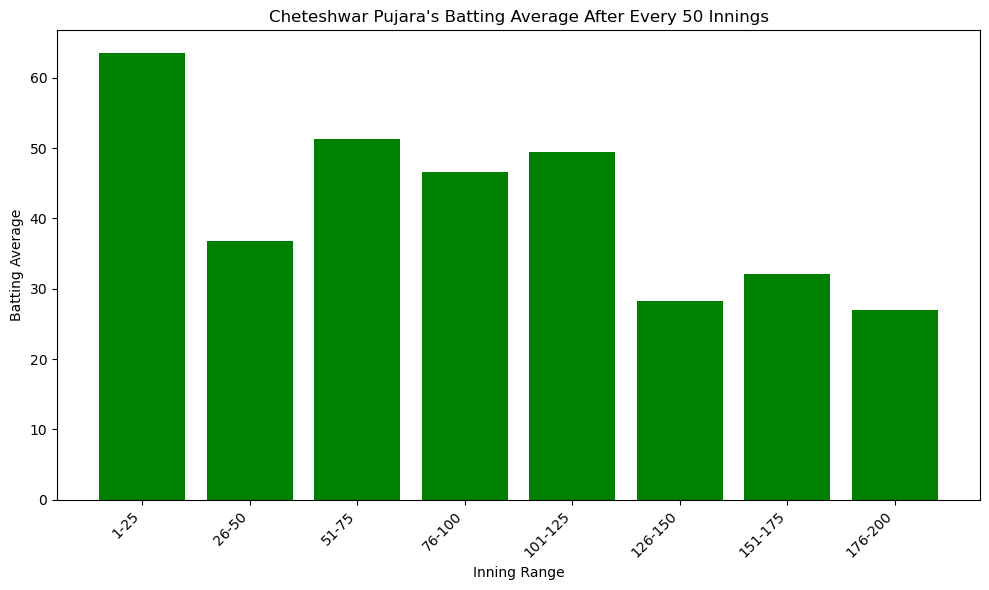

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(averages_table['Inning Range'], averages_table['Batting Average'], color='green')
plt.title("Cheteshwar Pujara's Batting Average After Every 50 Innings")
plt.xlabel("Inning Range")
plt.ylabel("Batting Average")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

   Inning  Runs
0      25  1335
1      50  2218
2      75  3399
3     100  4563
4     125  5751
5     150  6429
6     175  7168


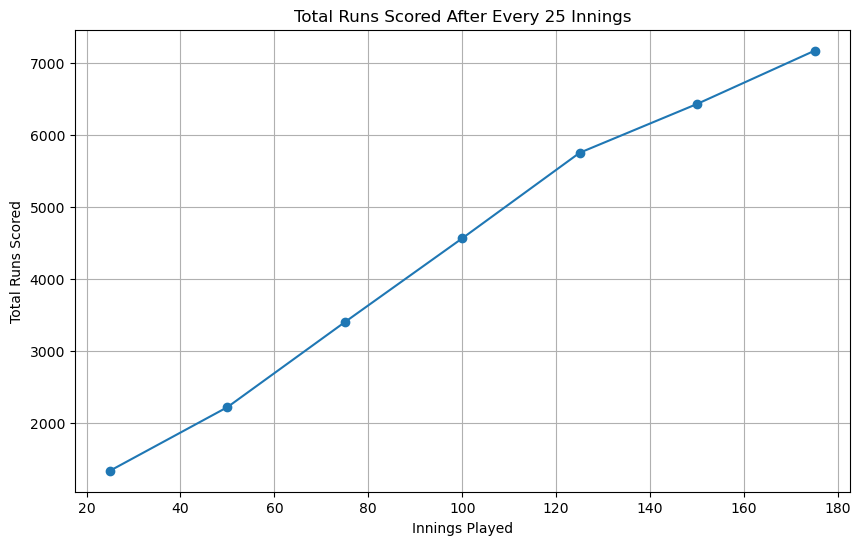

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the innings and total runs
innings_played = []
total_runs_scored = []

# Initializing variables for the cumulative sum
cumulative_runs = 0
innings_counter = 0

# Iterating through the DataFrame to calculate total runs after every 25 innings
for index, row in df.iterrows():
    innings_counter += 1
    cumulative_runs += row['Runs']
    
    # Check if 25 innings have been completed
    if innings_counter % 25 == 0:
        innings_played.append(innings_counter)
        total_runs_scored.append(cumulative_runs)

# Creating a DataFrame from the lists
totals_df = pd.DataFrame({'Inning': innings_played, 'Runs': total_runs_scored})

print(totals_df)

# Creating a line graph to visualize total runs scored after every 25 innings
plt.figure(figsize=(10, 6))
plt.plot(totals_df['Inning'], totals_df['Runs'], marker='o', linestyle='-')
plt.title("Total Runs Scored After Every 25 Innings")
plt.xlabel("Innings Played")
plt.ylabel("Total Runs Scored")
plt.grid(True)
plt.show()


  Innings Interval  Runs
0             1-25  1335
1            26-50   883
2            51-75  1181
3           76-100  1164
4          101-125  1188
5          126-150   678
6          151-175   739


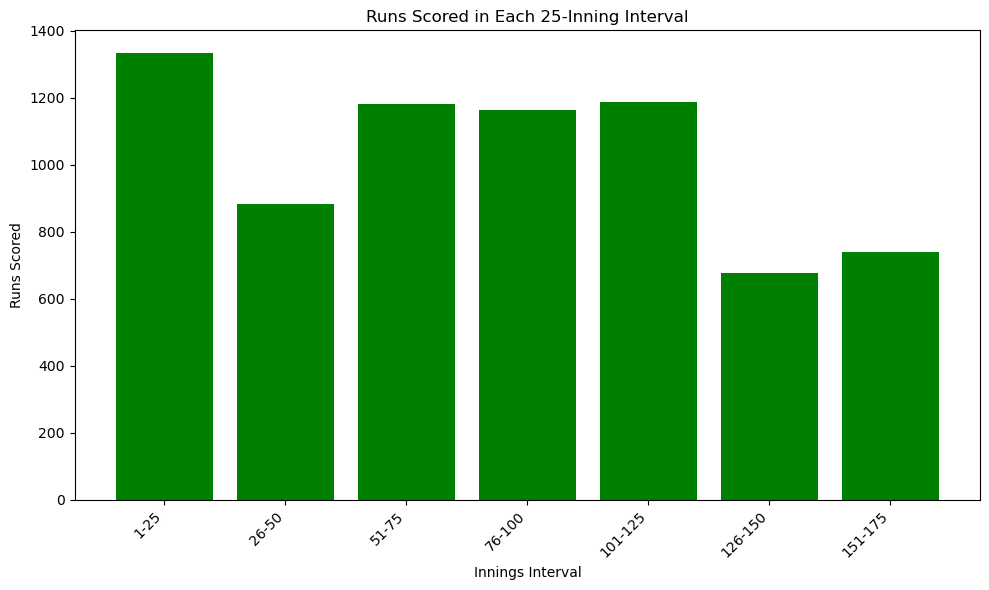

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the intervals and runs scored in each interval
innings_intervals = []
runs_in_interval = []

# Initializing variables for tracking the interval
interval_start = 1
interval_end = 25
interval_runs = 0

# Iterating through the DataFrame to calculate runs scored in each 25-inning interval
for index, row in df.iterrows():
    innings_played = row['Inning']
    runs_scored = row['Runs']
    
    if innings_played >= interval_start and innings_played <= interval_end:
        interval_runs += runs_scored
    
    # Check if 25 innings have been completed
    if innings_played == interval_end:
        innings_intervals.append(f"{interval_start}-{interval_end}")
        runs_in_interval.append(interval_runs)
        
        # Update interval variables
        interval_start = interval_end + 1
        interval_end += 25
        interval_runs = 0

# Creating a DataFrame from the lists
interval_df = pd.DataFrame({'Innings Interval': innings_intervals, 'Runs': runs_in_interval})

print(interval_df)

plt.figure(figsize=(10, 6))
plt.bar(interval_df['Innings Interval'], interval_df['Runs'], color='green')
plt.title("Runs Scored in Each 25-Inning Interval")
plt.xlabel("Innings Interval")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
